# Workflows
This notebook is an example on how to use the nasctn_workflow software to create complex sequences of tasks.
The software consists of 3 main parts:
1. A dependency system, that represents the depencies that tasks require to run 
2. Task, an abstract class that represents something to be done
3. Workflow an abstact class that represents a number of tasks that need to be done. Workflows are tasks,so workflows of workflows can be assembled. 

The flow of design is:
1. Define the tasks to be done. Each task can be a predefined one, or a new task defined through inheritance.
2. Define the dependencies for each task. There several stock dependencies and checkers, if a new dependency is needed, it is just a dictionary that uses a function that returns true if met or false if not met.
3. Add the dependencies to the tasks 
4. Add the tasks to the workflow

## Imports

In [ ]:
top_directory = r"C:\Users\sandersa\PycharmProjects"
import sys
from asmg_workflow import *
# todo make a setup.py

## A simple example
Supose you need to calculate a chain of functions that depend on the previous answer. We define three functions and create a workflow.

In [2]:
# Variable 
start_number  = 10.1e8
#### Define the functions
###############
def f1(x):
    """linear function, y = 3x+4"""
    return 3*x+4
def f2(x):
    """Square function x**2"""
    return x**2
def f3(x):
    """cubic function .25*x**3"""
    return .25*x**3
####################
### define the tasks
####################
# The first task does not depend on anything
# so we use FunctionTask
#######################
task_1 = FunctionTask(function = f1,args = [start_number],name = "linear")
#########################
# The next task depends on the first one 
# being done so we use DependentFunctionTask
# The input will be passed by the dependency
task_2 = DependentFunctionTask(function = f2, name ="square" )
################################################
task_3 = DependentFunctionTask(function =f3, name = "cubic")
###################
### define the dependencies
###################
# The first one is that the first task is done
dependency_1 = TaskDependency(input  = {"task":task_1})
# The next one is that the second task is done
dependency_2 = TaskDependency(input  = {"task":task_2})
########################
## Add the dependencies
#######################
task_2.add_dependency(dependency_1)
task_3.add_dependency(dependency_2)
#######################
## Create the workflow and add the tasks
#######################
test_workflow = Workflow(name = "test_workflow_1")
## The start task is special, it has to be run before everybody else. If you don't assign it then it is just empty and
# runs nothing
test_workflow.add_task(task_1)
test_workflow.add_task(task_2)
test_workflow.add_task(task_3)

An error occurred in opening the log linear_log_20220811_001.yaml, error:[Errno 2] No such file or directory: 'linear_log_20220811_001.yaml' creating a new one.
An error occurred in opening the log square_log_20220811_001.yaml, error:[Errno 2] No such file or directory: 'square_log_20220811_001.yaml' creating a new one.
An error occurred in opening the log cubic_log_20220811_001.yaml, error:[Errno 2] No such file or directory: 'cubic_log_20220811_001.yaml' creating a new one.
An error occurred in opening the log test_workflow_1_log_20220811_001.yaml, error:[Errno 2] No such file or directory: 'test_workflow_1_log_20220811_001.yaml' creating a new one.
An error occurred in opening the log Start_log_20220811_001.yaml, error:[Errno 2] No such file or directory: 'Start_log_20220811_001.yaml' creating a new one.
An error occurred in opening the log Stop_log_20220811_001.yaml, error:[Errno 2] No such file or directory: 'Stop_log_20220811_001.yaml' creating a new one.


### Now we run the workflow

In [3]:
# Executing the workflow, all the tasks will be arranged by their dependencies 
test_workflow.execute()

In [4]:
# Each workflow has a log and each task has one of its own
print(test_workflow.log)

- event: Log Creation
  timestamp: 2022-08-11 11:36:42.016950
- event: Task test_workflow_1 was created.
  timestamp: 2022-08-11 11:36:42.026952
- event: Task id is 5301987c-2d58-45e5-8448-9b8484fee9c6
  timestamp: 2022-08-11 11:36:42.026952
- event: Starting slot 0, tasks ['Start'] have started
  timestamp: 2022-08-11 11:36:42.181686
- event: The task Start has completed
  timestamp: 2022-08-11 11:36:42.198644
- event: Starting slot 1, tasks ['linear'] have started
  timestamp: 2022-08-11 11:36:42.227815
- event: The task linear has completed
  timestamp: 2022-08-11 11:36:42.239992
- event: Starting slot 2, tasks ['square'] have started
  timestamp: 2022-08-11 11:36:42.348828
- event: The task square has completed
  timestamp: 2022-08-11 11:36:42.358826
- event: Starting slot 3, tasks ['cubic'] have started
  timestamp: 2022-08-11 11:36:42.518834
- event: The task cubic has completed
  timestamp: 2022-08-11 11:36:42.528835
- event: Starting slot 4, tasks ['Stop'] have started
  timest

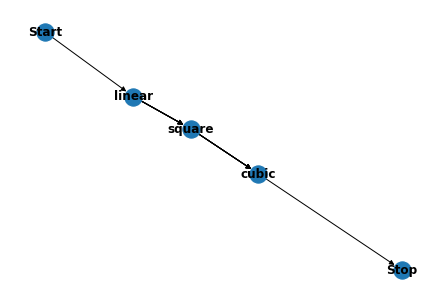

In [5]:
# the show method creates a network graph
# You can display by node name or by scheduled slot
test_workflow.show(display = "name",verbose = False)

The slot index is 0
The slot index is 1
The task index is 0 and the task is linear
The slot index is 1, The task index is 0 and the task is <nasctn_workflow.code_.tasks.FunctionTask object at 0x000001F622CF64E0>
Adding the edge Start,linear 
The slot index is 2
The task index is 0 and the task is square
task is in the list of dependencies
task is the dependency type 
The slot index is 3
The task index is 0 and the task is cubic
task is in the list of dependencies
task is the dependency type 
The task index is 0 and the task is <nasctn_workflow.code_.tasks.DependentFunctionTask object at 0x000001F622CF65F8>
The slot index is 4


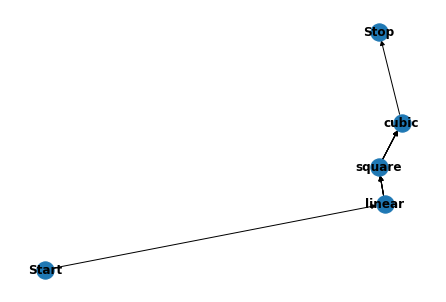

In [6]:
# the show method creates a network graph
# You can display by node name or by scheduled slot
test_workflow.show(display = "name",verbose = True)

In [7]:
# here is a printed output of the executed tasks
for task in test_workflow.tasks:
    try:
        print(f'The ouput of task {task.name} is {task.output}')
    except:
        pass

The ouput of task cubic is 1.934620489794049e+56
The ouput of task square is 9.18090002424e+18
The ouput of task linear is 3030000004.0


In [8]:
# An example of the task log
print(task_1.log)

- event: Log Creation
  timestamp: 2022-08-11 11:36:41.849325
- event: Task linear was created.
  timestamp: 2022-08-11 11:36:41.874330
- event: Task id is 7be106f7-7024-4839-9f32-6b70df0bd2fa
  timestamp: 2022-08-11 11:36:41.883324
- event: Execution of function <function f1 at 0x000001F67CEE5BF8> has begun
  timestamp: 2022-08-11 11:36:42.209642
- event: Execution of function <function f1 at 0x000001F67CEE5BF8> has completed
  timestamp: 2022-08-11 11:36:42.217642



In [9]:
# Each task gets a UUID upon creation
task_2.id

UUID('296f600c-f612-40cd-aa1d-1c4db10f693b')

## A slightly more complex example
In this example we will calculate three numbers and then pass the results to a final function that uses all three.

In [10]:
# variables
x = 1
y = 2
z = 3

#############
# Functions - we will use f1,f2,f3 from the previous example
def f4(x,y,z):
    """Calculate x+y-z"""
    return x+y-z

# Task Defintion - notice the FunctionTask instead of Dependent Function Task
# Also the class MultipleDependentFunctionTask takes input from multiple previous tasks
example2_task_1 = FunctionTask(function = f1,args = [x],name = "linear")
example2_task_2 = FunctionTask(function = f2,args = [y],name = "square")
example2_task_3 = FunctionTask(function = f3,args = [z],name = "cubic")
example2_task_4 = MultipleDependentFunctionTask(function = f4,name = "combiner")
# Dependency defintion
dependency_1 = TaskDependency(input={"task":example2_task_1,"output_name":"x"})
dependency_2 = TaskDependency(input={"task":example2_task_2,"output_name":"y"})
dependency_3 = TaskDependency(input={"task":example2_task_3,"output_name":"z"})
# Add the dependecies to task_4
example2_task_4.add_dependency(dependency_1)
example2_task_4.add_dependency(dependency_2)
example2_task_4.add_dependency(dependency_3)
# Create worflow and add tasks
workflow = Workflow(name = "test_workflow_2")
workflow.add_task(example2_task_1)
workflow.add_task(example2_task_2)
workflow.add_task(example2_task_3)
workflow.add_task(example2_task_4)



An error occurred in opening the log linear_log_20220811_002.yaml, error:[Errno 2] No such file or directory: 'linear_log_20220811_002.yaml' creating a new one.
An error occurred in opening the log square_log_20220811_002.yaml, error:[Errno 2] No such file or directory: 'square_log_20220811_002.yaml' creating a new one.
An error occurred in opening the log cubic_log_20220811_002.yaml, error:[Errno 2] No such file or directory: 'cubic_log_20220811_002.yaml' creating a new one.
An error occurred in opening the log combiner_log_20220811_001.yaml, error:[Errno 2] No such file or directory: 'combiner_log_20220811_001.yaml' creating a new one.
An error occurred in opening the log test_workflow_2_log_20220811_001.yaml, error:[Errno 2] No such file or directory: 'test_workflow_2_log_20220811_001.yaml' creating a new one.
An error occurred in opening the log Start_log_20220811_002.yaml, error:[Errno 2] No such file or directory: 'Start_log_20220811_002.yaml' creating a new one.
An error occurre

In [11]:
#execute
workflow.execute()

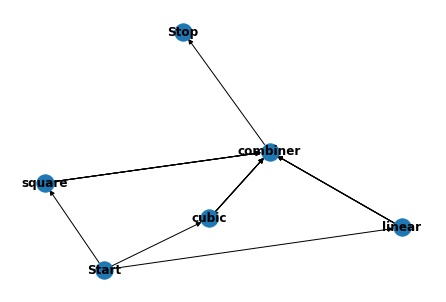

In [12]:
workflow.show(display="name")

In [13]:
# here is a printed output of the executed tasks
for task in workflow.tasks:
    try:
        print(f'The ouput of task {task.name} is {task.output}')
    except:
        pass

The ouput of task combiner is 4.25
The ouput of task cubic is 6.75
The ouput of task square is 4
The ouput of task linear is 7


In [14]:
print(workflow.log)

- event: Log Creation
  timestamp: 2022-08-11 11:36:44.074545
- event: Task test_workflow_2 was created.
  timestamp: 2022-08-11 11:36:44.085220
- event: Task id is fddb306e-3c11-4dd1-a5f0-b163801c6ea8
  timestamp: 2022-08-11 11:36:44.092226
- event: Starting slot 0, tasks ['Start'] have started
  timestamp: 2022-08-11 11:36:44.194159
- event: The task Start has completed
  timestamp: 2022-08-11 11:36:44.202156
- event: Starting slot 1, tasks ['cubic', 'square', 'linear'] have started
  timestamp: 2022-08-11 11:36:44.243494
- event: The task cubic has completed
  timestamp: 2022-08-11 11:36:44.253491
- event: The task square has completed
  timestamp: 2022-08-11 11:36:44.261008
- event: The task linear has completed
  timestamp: 2022-08-11 11:36:44.271026
- event: Starting slot 2, tasks ['combiner'] have started
  timestamp: 2022-08-11 11:36:44.461028
- event: The task combiner has completed
  timestamp: 2022-08-11 11:36:44.471027
- event: Starting slot 3, tasks ['Stop'] have started
 

In [15]:
workflow.log.log

[{'timestamp': datetime.datetime(2022, 8, 11, 11, 36, 44, 74545),
  'event': 'Log Creation'},
 {'timestamp': datetime.datetime(2022, 8, 11, 11, 36, 44, 85220),
  'event': 'Task test_workflow_2 was created.'},
 {'timestamp': datetime.datetime(2022, 8, 11, 11, 36, 44, 92226),
  'event': 'Task id is fddb306e-3c11-4dd1-a5f0-b163801c6ea8'},
 {'timestamp': datetime.datetime(2022, 8, 11, 11, 36, 44, 194159),
  'event': "Starting slot 0, tasks ['Start'] have started"},
 {'timestamp': datetime.datetime(2022, 8, 11, 11, 36, 44, 202156),
  'event': 'The task Start has completed'},
 {'timestamp': datetime.datetime(2022, 8, 11, 11, 36, 44, 243494),
  'event': "Starting slot 1, tasks ['cubic', 'square', 'linear'] have started"},
 {'timestamp': datetime.datetime(2022, 8, 11, 11, 36, 44, 253491),
  'event': 'The task cubic has completed'},
 {'timestamp': datetime.datetime(2022, 8, 11, 11, 36, 44, 261008),
  'event': 'The task square has completed'},
 {'timestamp': datetime.datetime(2022, 8, 11, 11, 36

In [16]:
workflow.reset_workflow()

In [17]:
workflow.execute(exit_condition='concurrently')

In [18]:
print(workflow.log)

- event: Log Creation
  timestamp: 2022-08-11 11:36:44.074545
- event: Task test_workflow_2 was created.
  timestamp: 2022-08-11 11:36:44.085220
- event: Task id is fddb306e-3c11-4dd1-a5f0-b163801c6ea8
  timestamp: 2022-08-11 11:36:44.092226
- event: Starting slot 0, tasks ['Start'] have started
  timestamp: 2022-08-11 11:36:44.194159
- event: The task Start has completed
  timestamp: 2022-08-11 11:36:44.202156
- event: Starting slot 1, tasks ['cubic', 'square', 'linear'] have started
  timestamp: 2022-08-11 11:36:44.243494
- event: The task cubic has completed
  timestamp: 2022-08-11 11:36:44.253491
- event: The task square has completed
  timestamp: 2022-08-11 11:36:44.261008
- event: The task linear has completed
  timestamp: 2022-08-11 11:36:44.271026
- event: Starting slot 2, tasks ['combiner'] have started
  timestamp: 2022-08-11 11:36:44.461028
- event: The task combiner has completed
  timestamp: 2022-08-11 11:36:44.471027
- event: Starting slot 3, tasks ['Stop'] have started
 

## Two Combined Workflows


In [19]:
test_workflow.reset_workflow()
workflow.reset_workflow()
combined_workflow = Workflow()
combined_workflow.add_task(test_workflow)
combined_workflow.add_task(workflow)

An error occurred in opening the log New_workflow_20220811_001_log_20220811_001.yaml, error:[Errno 2] No such file or directory: 'New_workflow_20220811_001_log_20220811_001.yaml' creating a new one.
An error occurred in opening the log Start_log_20220811_003.yaml, error:[Errno 2] No such file or directory: 'Start_log_20220811_003.yaml' creating a new one.
An error occurred in opening the log Stop_log_20220811_003.yaml, error:[Errno 2] No such file or directory: 'Stop_log_20220811_003.yaml' creating a new one.


In [20]:
combined_workflow.execute(exit_condition='concurrently')

In [21]:
print(combined_workflow.log)

- event: Log Creation
  timestamp: 2022-08-11 11:36:45.973543
- event: Task New_workflow_20220811_001 was created.
  timestamp: 2022-08-11 11:36:45.983543
- event: Task id is 4ad69354-1540-4f84-82d1-f929d0c6f580
  timestamp: 2022-08-11 11:36:45.983543
- event: Starting slot 0, tasks ['Start'] have started
  timestamp: 2022-08-11 11:36:46.075153
- event: The task Start has completed
  timestamp: 2022-08-11 11:36:46.086143
- event: Starting slot 1, tasks ['test_workflow_2', 'test_workflow_1'] have started
  timestamp: 2022-08-11 11:36:47.286345
- event: The task test_workflow_2 has completed
  timestamp: 2022-08-11 11:36:47.312006
- event: The task test_workflow_1 has completed
  timestamp: 2022-08-11 11:36:47.343579
- event: Starting slot 2, tasks ['Stop'] have started
  timestamp: 2022-08-11 11:36:47.370866
- event: The task Stop has completed
  timestamp: 2022-08-11 11:36:47.385875



The slot index is 0
The slot index is 1
The task index is 0 and the task is test_workflow_2
The task index is 1 and the task is test_workflow_1
The task index is 0 and the task is <nasctn_workflow.code_.workflows.Workflow object at 0x000001F622EE7C88>
The task index is 1 and the task is <nasctn_workflow.code_.workflows.Workflow object at 0x000001F622CF6978>
The slot index is 1, The task index is 0 and the task is <nasctn_workflow.code_.workflows.Workflow object at 0x000001F622EE7C88>
Adding the edge Start,test_workflow_2 
The slot index is 1, The task index is 1 and the task is <nasctn_workflow.code_.workflows.Workflow object at 0x000001F622CF6978>
Adding the edge Start,test_workflow_1 
The slot index is 2


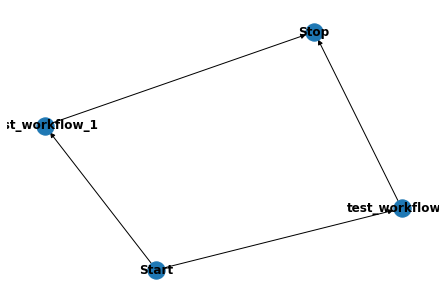

In [22]:
combined_workflow.show(type_="nx",display = "name",verbose = True)

In [23]:
print(combined_workflow.tasks[1].log)

- event: Log Creation
  timestamp: 2022-08-11 11:36:44.074545
- event: Task test_workflow_2 was created.
  timestamp: 2022-08-11 11:36:44.085220
- event: Task id is fddb306e-3c11-4dd1-a5f0-b163801c6ea8
  timestamp: 2022-08-11 11:36:44.092226
- event: Starting slot 0, tasks ['Start'] have started
  timestamp: 2022-08-11 11:36:44.194159
- event: The task Start has completed
  timestamp: 2022-08-11 11:36:44.202156
- event: Starting slot 1, tasks ['cubic', 'square', 'linear'] have started
  timestamp: 2022-08-11 11:36:44.243494
- event: The task cubic has completed
  timestamp: 2022-08-11 11:36:44.253491
- event: The task square has completed
  timestamp: 2022-08-11 11:36:44.261008
- event: The task linear has completed
  timestamp: 2022-08-11 11:36:44.271026
- event: Starting slot 2, tasks ['combiner'] have started
  timestamp: 2022-08-11 11:36:44.461028
- event: The task combiner has completed
  timestamp: 2022-08-11 11:36:44.471027
- event: Starting slot 3, tasks ['Stop'] have started
 